In [6]:
import sys

sys.path.append('../')

import os
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from utils.data import load_mat
from utils.visualization import *

data_path = '../data/'
results_path = '../results/'

### Load Images

In [7]:
IP_img = load_mat(os.path.join(data_path, 'IP.mat'))
gt = load_mat(os.path.join(results_path, 'gt_simulation.mat'))
SoS = load_mat(os.path.join(data_path, 'SoS.mat'))
SoS_sb = load_mat(os.path.join(data_path, 'SoS_SB.mat'))
rec_das = load_mat(os.path.join(results_path, 'das_simulation.mat'))
rec_das_sb = load_mat(os.path.join(results_path, 'das_simulation_sb.mat'))
rec_apact = load_mat(os.path.join(results_path, 'apact_simulation.mat'))
rec_apact_sb = load_mat(os.path.join(results_path, 'apact_simulation_sb.mat'))
rec_wiener = load_mat(os.path.join(results_path, 'sb_wiener_simulation.mat'))    
rec_wiener_sb = load_mat(os.path.join(results_path, 'sb_wiener_simulation_sb.mat'))

In [8]:
[IP_img, gt, rec_das, rec_das_sb, rec_apact, rec_apact_sb, rec_wiener, rec_wiener_sb] = [normalize(img) for img in [IP_img, gt, rec_das, rec_das_sb, rec_apact, rec_apact_sb, rec_wiener, rec_wiener_sb]]

### Create Figure

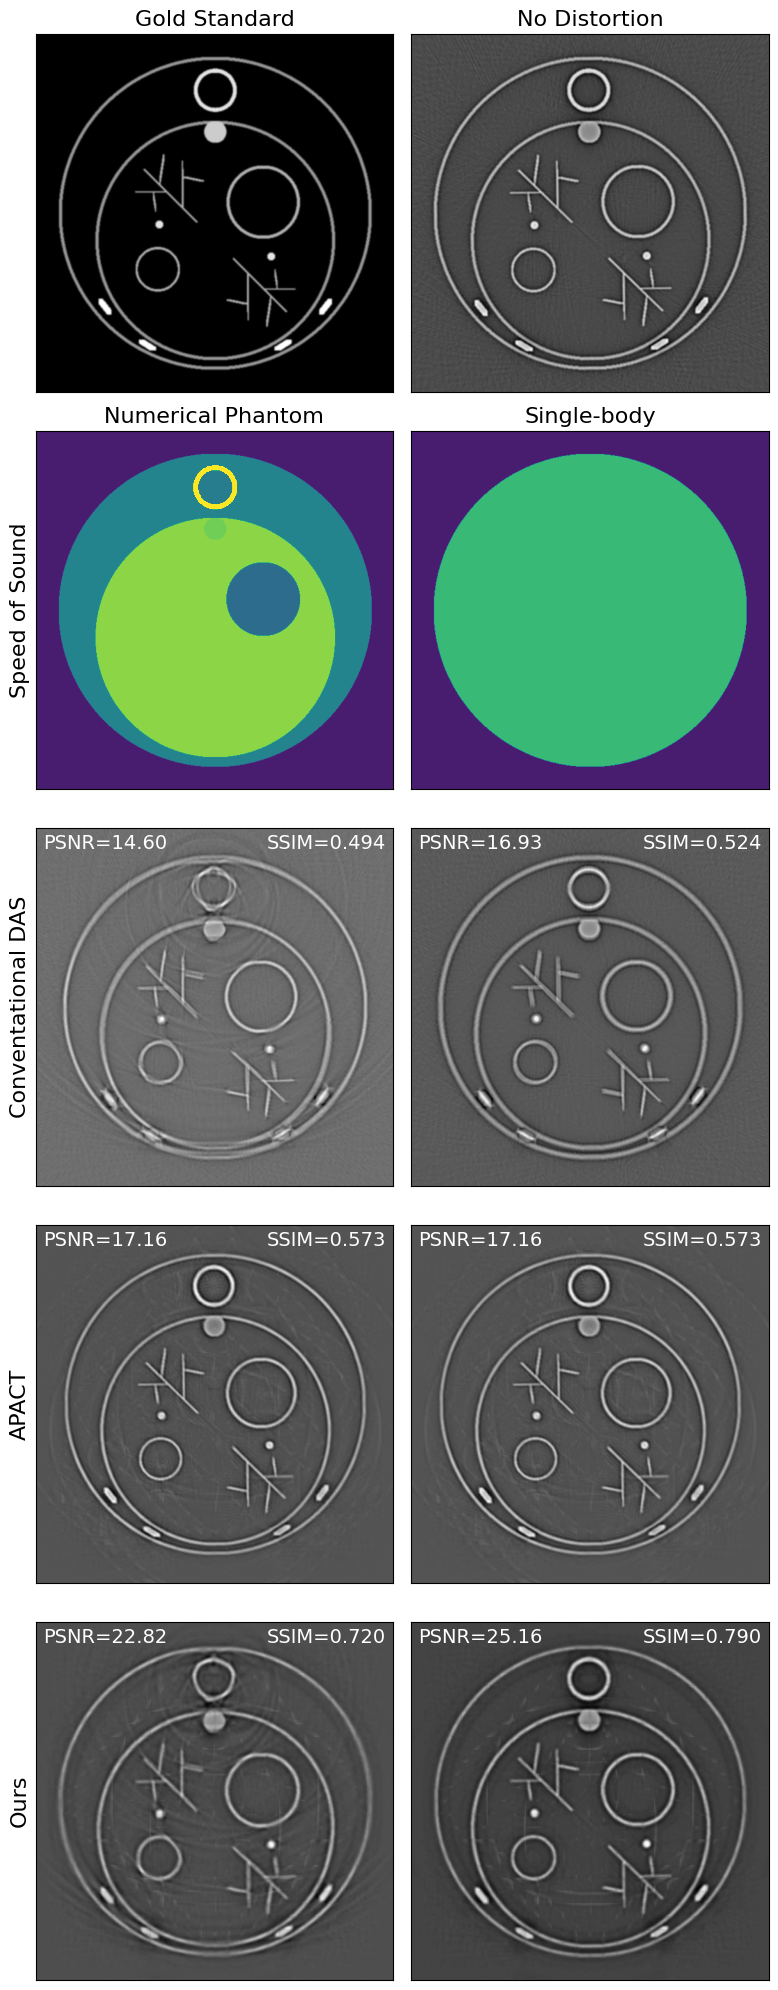

In [9]:
plt.figure(figsize=(8,20))
norm_sos = Normalize(vmax=1600, vmin=1500)
plt.subplot(5,2,1)
plt.imshow(IP_img, cmap='gray')
plt.title('Gold Standard', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,2)
plt.imshow(gt, cmap='gray')
plt.title('No Distortion', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,3)
plt.imshow(SoS, norm=norm_sos)
plt.title('Numerical Phantom', fontsize=16)
plt.ylabel('Speed of Sound', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,4)
plt.imshow(SoS_sb, norm=norm_sos)
plt.title('Single-body', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,5)
plt.imshow(rec_das, cmap='gray')
plt.title('PSNR={:.2f}'.format(psnr(gt, rec_das, data_range=1)), loc='left', x=0.02, y=0.92, fontsize=14, color='white')
plt.title('SSIM={:.3f}'.format(ssim(gt, rec_das, data_range=1)), loc='right', x=0.98, y=0.92, fontsize=14, color='white')
plt.ylabel('Conventational DAS', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,6)
plt.imshow(rec_das_sb, cmap='gray')
plt.title('PSNR={:.2f}'.format(psnr(gt, rec_das_sb, data_range=1)), loc='left', x=0.02, y=0.92, fontsize=14, color='white')
plt.title('SSIM={:.3f}'.format(ssim(gt, rec_das_sb, data_range=1)), loc='right', x=0.98, y=0.92, fontsize=14, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,7)
plt.imshow(rec_apact_sb, cmap='gray')
plt.title('PSNR={:.2f}'.format(psnr(gt, rec_apact_sb, data_range=1)), loc='left', x=0.02, y=0.92, fontsize=14, color='white')
plt.title('SSIM={:.3f}'.format(ssim(gt, rec_apact_sb, data_range=1)), loc='right', x=0.98, y=0.92, fontsize=14, color='white')
plt.ylabel('APACT', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,8)
plt.imshow(rec_apact_sb, cmap='gray')
plt.title('PSNR={:.2f}'.format(psnr(gt, rec_apact_sb, data_range=1)), loc='left', x=0.02, y=0.92, fontsize=14, color='white')
plt.title('SSIM={:.3f}'.format(ssim(gt, rec_apact_sb, data_range=1)), loc='right', x=0.98, y=0.92, fontsize=14, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,9)
plt.imshow(rec_wiener, cmap='gray')
plt.title('PSNR={:.2f}'.format(psnr(gt, rec_wiener, data_range=1)), loc='left', x=0.02, y=0.92, fontsize=14, color='white')
plt.title('SSIM={:.3f}'.format(ssim(gt, rec_wiener, data_range=1)), loc='right', x=0.98, y=0.92, fontsize=14, color='white')
plt.ylabel('Ours', fontsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(5,2,10)
plt.imshow(rec_wiener_sb, cmap='gray')
plt.title('PSNR={:.2f}'.format(psnr(gt, rec_wiener_sb, data_range=1)), loc='left', x=0.02, y=0.92, fontsize=14, color='white')
plt.title('SSIM={:.3f}'.format(ssim(gt, rec_wiener_sb, data_range=1)), loc='right', x=0.98, y=0.92, fontsize=14, color='white')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('simulation_results.png')